# Predicting if a person will have diabetes or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('../../../Data Science/DataSets/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#columns that can't be zero
zero_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_column:
    data[col] = data[col].replace(0, np.nan)
    mean = data[col].mean(skipna=True)
    data[col] = data[col].replace(np.nan, mean)

In [4]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = model.predict(X_test)

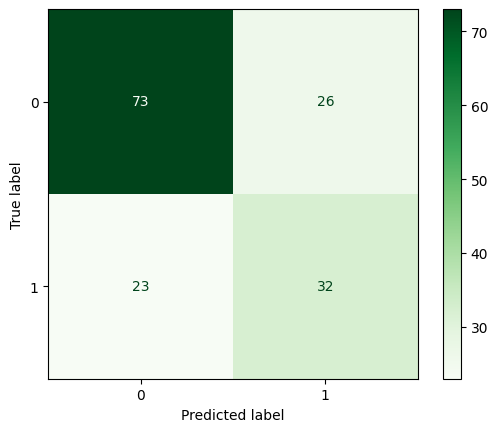

In [8]:
cm = confusion_matrix(y_test, y_pred)
dig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
dig.plot(cmap=plt.cm.Greens)

In [10]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("F1_score: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.6818181818181818
Accuracy: 1.0
F1_score: 0.5663716814159292
